In [8]:
#Q8
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download the data from the given API link
url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
response = requests.get(url)

# Extract the required data from the response
data = response.json()
episodes = data['_embedded']['episodes']

# Create a list to store the extracted data
episode_data = []

# Extract the required data for each episode and append it to the list
for episode in episodes:
    if '_embedded' in episode:
        show_href = episode['_embedded']['show']['href']
    else:
        show_href = None
    episode_dict = {
        'ID': episode['id'],
        'Name': episode['name'],
        'Season': episode['season'],
        'URL': episode['url'],
        'Number': episode['number'],
        'Airtime': episode['airtime'],
        'Type': episode['type'],
        'Airdate': episode['airdate'],
        'Airstamp': episode['airstamp'],
        'Runtime': episode['runtime'],
        'Rating': episode['rating']['average'],
        'Image Medium URL': episode['image']['medium'],
        'Image Original URL': episode['image']['original'],
        'Summary': episode['summary'],
        'Show Href': show_href
    }
    episode_data.append(episode_dict)

# Convert the list of dictionaries into a pandas DataFrame
df = pd.DataFrame(episode_data)


In [9]:
df

,ID,Name,Season,URL,Number,Airtime,Type,Airdate,Airstamp,Runtime,Rating,Image Medium URL,Image Original URL,Summary,Show Href
0,869671,The Original,1,https://www.tvmaze.com/episodes/869671/westwor...,1,21:00,regular,2016-10-02,2016-10-03T01:00:00+00:00,68,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>A woman named Dolores is a free spirit in t...,None
1,911201,Chestnut,1,https://www.tvmaze.com/episodes/911201/westwor...,2,21:00,regular,2016-10-09,2016-10-10T01:00:00+00:00,60,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Bernard suspects that someone is sabotaging...,None
2,911204,The Stray,1,https://www.tvmaze.com/episodes/911204/westwor...,3,21:00,regular,2016-10-16,2016-10-17T01:00:00+00:00,60,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Bernard continues to investigate Dolores' s...,None
3,911205,Dissonance Theory,1,https://www.tvmaze.com/episodes/911205/westwor...,4,21:00,regular,2016-10-23,2016-10-24T01:00:00+00:00,60,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>While Dolores joins William and Logan on th...,None
4,927174,Contrapasso,1,https://www.tvmaze.com/episodes/927174/westwor...,5,21:00,regular,2016-10-30,2016-10-31T01:00:00+00:00,60,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Dolores takes the first step on her path of...,None
5,932057,The Adversary,1,https://www.tvmaze.com/episodes/932057/westwor...,6,21:00,regular,2016-11-06,2016-11-07T02:00:00+00:00,60,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,"<p>While Maeve convinces Felix to show her ""up...",None
6,938404,Trompe L'Oeil,1,https://www.tvmaze.com/episodes/938404/westwor...,7,21:00,regular,2016-11-13,2016-11-14T02:00:00+00:00,60,8.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>While William and Dolores travel to the unc...,None
7,943065,Trace Decay,1,https://www.tvmaze.com/episodes/943065/westwor...,8,21:00,regular,2016-11-20,2016-11-21T02:00:00+00:00,60,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Bernard tries to cope with what he did unde...,None
8,943066,The Well-Tempered Clavier,1,https://www.tvmaze.com/episodes/943066/westwor...,9,21:00,regular,2016-11-27,2016-11-28T02:00:00+00:00,60,8.5,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Bernard forces Robert to take him back into...,None
9,943067,The Bicameral Mind,1,https://www.tvmaze.com/episodes/943067/westwor...,10,21:00,regular,2016-12-04,2016-12-05T02:00:00+00:00,90,8.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Delores finds out the truth about William's...,None


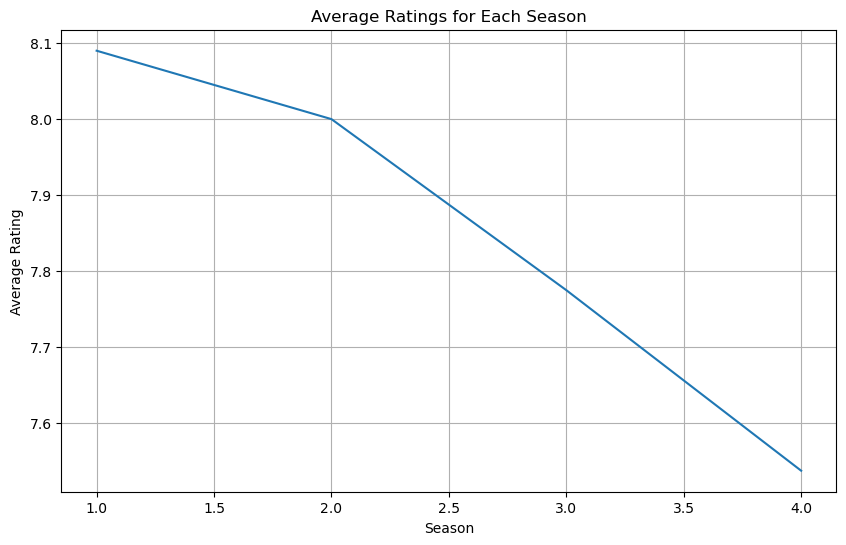

In [10]:
# 1. Draw plots to compare ratings for all seasons
season_ratings = df.groupby('Season')['Rating'].mean()
seasons = season_ratings.index

# Plotting ratings for each season
season_ratings.plot(kind='line', figsize=(10, 6))
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [4]:
# 2. Get episode names with average rating > 8 for each season
high_rated_episodes = df[df['Rating'] > 8].groupby(['Season', 'Number'])['Name'].unique()

high_rated_episodes

Season  Number
1       7                     [Trompe L'Oeil]
        9         [The Well-Tempered Clavier]
        10               [The Bicameral Mind]
2       8                           [Kiksuya]
        9                   [Vanishing Point]
        10                    [The Passenger]
Name: Name, dtype: object

In [11]:
# 3. Get episode names that aired before May 2019
before_may_2019 = df[pd.to_datetime(df['Airdate']) < pd.to_datetime('2019-05')]['Name'].unique()

before_may_2019

array(['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory',
       'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay',
       'The Well-Tempered Clavier', 'The Bicameral Mind',
       'Journey Into Night', 'Reunion', 'Virtù e Fortuna',
       'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space',
       'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger'],
      dtype=object)

In [12]:
lowest_rated_episodes = df.groupby('Season').apply(lambda x: x.loc[x['Rating'].idxmin(), 'Name'])
print(lowest_rated_episodes)

Season
1       The Stray
2    Akane No Mai
3     Decoherence
4    The Auguries
dtype: object


In [13]:
# 4. Get the episode name with the highest and lowest rating for each season
highest_rated_episodes = df.groupby('Season').apply(lambda x: x.loc[x['Rating'].idxmax(), 'Name'])
print(highest_rated_episodes)

Season
1    The Bicameral Mind
2               Kiksuya
3          Parce Domine
4              Zhuangzi
dtype: object


In [14]:
# 5. Get the summary for the most popular (highest rated) episode in every season
popular_episodes = df.groupby('Season').apply(lambda x: x.loc[x['Rating'].idxmax(), ['Name', 'Summary']])

popular_episodes


,Name,Summary
Season,,
1,The Bicameral Mind,<p>Delores finds out the truth about William's...
2,Kiksuya,<p>Another of Westworld's Host revolutionaries...
3,Parce Domine,"<p>If you're stuck in a loop, try walking in a..."
4,Zhuangzi,<p>God is bored.</p>
